In [1]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

%matplotlib inline

### Movie info

In [2]:
# Read in the data as movie_info
# Use parse_dates and pass column name to read it as a datetime
movie_info = pd.read_csv('Data/rt.movie_info.tsv', encoding='latin-1', sep='\t', 
                        parse_dates=['theater_date', 'dvd_date'])
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN


In [3]:
movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [4]:
# Info on the dataframe
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 146.4+ KB


In [5]:
#checking how many null values there are in each column
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

### Step 1: look at Runtime across movies, what's the average runtime?

In [6]:
movie_info['runtime'].value_counts()

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
240 minutes     1
165 minutes     1
64 minutes      1
56 minutes      1
15 minutes      1
Name: runtime, Length: 142, dtype: int64

In [7]:
movie_info['runtime']

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object

We will change the type of runtime column into actual numbers so we can work on it

In [8]:
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes',"")
movie_info['runtime'] = pd.to_numeric(movie_info['runtime'])

In [9]:
#to confirm that the type has changed
movie_info['runtime'].dtype

dtype('float64')

In [10]:
lowest_five_runtime = movie_info.sort_values('runtime', ascending=True)
lowest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1358,1753,Carmel Myers' co-star in this amusing farce is...,NR,Comedy,Paul Powell,NaN,NaT,NaT,NaN,NaN,5.0,NaN
540,707,James Pierce is one of the lesser-known film T...,NR,Action and Adventure,NaN,NaN,NaT,NaT,NaN,NaN,6.0,NaN
273,361,NaN,NR,Drama|Special Interest,Roberto Sanchez Santos,NaN,NaT,NaT,NaN,NaN,7.0,NaN
950,1229,A short fashion film.,NR,Documentary,NaN,NaN,NaT,NaT,NaN,NaN,10.0,NaN
983,1275,"Desperately seeking to save his marriage, Bren...",NR,Drama,Jen McGowan,Colin Pink|Jen McGowan,NaT,NaT,NaN,NaN,11.0,NaN


In [11]:
highest_five_runtime = movie_info.sort_values('runtime', ascending=False)
highest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
639,823,Directed by Marco Tullio Giordana and La Megli...,R,Art House and International|Drama|Romance,Marco Tullio Giordana,Stefano Rulli|Sandro Petraglia,2003-06-22,2006-02-07,NaN,NaN,358.0,Miramax Films
508,666,"After twenty-five years, a trio of old high sc...",NR,Drama|Mystery and Suspense,Paul Wendkos,NaN,NaT,NaT,NaN,NaN,313.0,NaN
1111,1434,When a pay cut sends Australian dock workers o...,NR,Drama|Romance,Chris Thomson,NaN,NaT,NaT,NaN,NaN,294.0,NaN
1490,1918,A collection of 15 chapters from Tarzan and th...,NR,Action and Adventure|Classics|Documentary,Henry MacRae|Harry McRae,William Lord Wright|Ian McCloskey Heath,1929-10-01,2006-10-24,NaN,NaN,290.0,NaN
1029,1332,Based on the classic Nathaniel Hawthorne novel...,NR,Drama|Television,Rick Hauser,NaN,NaT,NaT,NaN,NaN,240.0,NaN


In [12]:
print(movie_info['runtime'].min())
print(movie_info['runtime'].max())

5.0
358.0


Mean Value for Runtime column: 103.96797385620916
Median Value for Runtime column: 100.0


C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


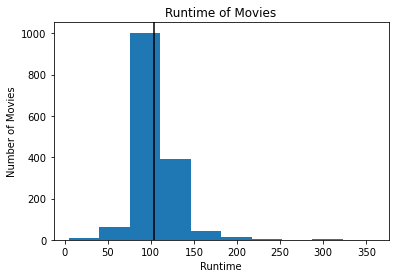

In [13]:
runtime_mean = movie_info['runtime'].mean()
runtime_median = movie_info['runtime'].median()

fig, ax = plt.subplots()

ax.hist(movie_info['runtime'])
plt.axvline(x = movie_info['runtime'].mean(), color = 'black')
ax.set_title("Runtime of Movies")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of Movies")

print("Mean Value for Runtime column: {}".format(runtime_mean))
print("Median Value for Runtime column: {}".format(runtime_median))

From the visualization above, we can see the data has a slightly positive skew.
Almost 1000 movies have an avergae of 100 minutes of running time.

**Dropping rows that contain missing values:** runtime column contains 30 null values in this case we will simply drop any rows that contain them. The number dropped does not constitute a significant portion of our dataset, so dropping the values is an acceptable loss

In [14]:
movie_info = movie_info.dropna(subset=['runtime'])
movie_info.isna().sum()

id                 0
synopsis          45
rating             0
genre              4
director         185
writer           430
theater_date     336
dvd_date         336
currency        1192
box_office      1192
runtime            0
studio          1041
dtype: int64

### Organizing & Cleaning
To organize our data and make it simpler to visualize, I will go ahead and drop the columns that I won't be using for better visibility

In [15]:
# Drop the irrelevant columns
drop_columns = ['synopsis', 'theater_date', 'dvd_date', 'currency', 'studio']
movie_info.drop(drop_columns, axis=1, inplace=True)
movie_info.head()

,id,rating,genre,director,writer,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,NaN,104.0
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108.0
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,NaN,116.0
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,NaN,128.0
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200.0


### let's check the rating and see what's the most popular

In [18]:
movie_info['rating'].value_counts()

R        519
NR       482
PG       239
PG-13    232
G         57
NC17       1
Name: rating, dtype: int64

In [33]:
movie_info['rating'].dtype

dtype('O')

In [20]:
# There are only 3 null values so let's drop them from the rating column 
movie_info = movie_info.dropna(subset=['rating'])
movie_info.isna().sum()

id               0
rating           0
genre            4
director       185
writer         430
box_office    1192
runtime          0
dtype: int64

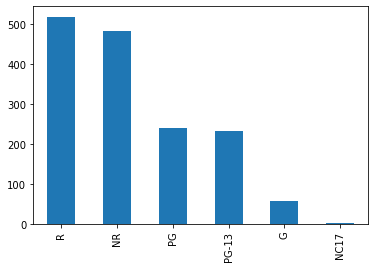

In [37]:
# now let's visualize it
movie_info['rating'].value_counts().plot(kind='bar');


The graph shows us that the highest rating of movies is R.

### Looking at tmdb data set
### tmdb Movies

In [38]:
tmdb = pd.read_csv('Data/tmdb.movies.csv', index_col=0, parse_dates=['release_date'])
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [39]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [40]:
# it looks like we don't have any null values, but just to confirm:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [41]:
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


### Look at Movies by popularity

Top Ten movies:

In [42]:
top_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=False,by='popularity').head(10)
top_ten_movies_by_pop

,popularity
original_title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508
Ralph Breaks the Internet,48.057


Bottom Ten movies

In [44]:
Bottom_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=True,by='popularity').head(10)
Bottom_ten_movies_by_pop

,popularity
original_title,
"""BLESSED""",0.6
Lenny Cooke,0.6
Leolex,0.6
Leonard Cohen - Songs from the Road,0.6
Leonard in Slow Motion,0.6
Leones,0.6
Leopard,0.6
Les Profs,0.6
Lemonade + Ducktape Stuffs,0.6


### Looking into release date to see if there is a certain time of the year that has higher releases

To organize our data and make it simpler to visualize, I will go ahead and drop the columns that I won't be using for better visibility

In [45]:
# Drop the irrelevant columns
drop_columns = ['original_title','original_language','genre_ids']
tmdb.drop(drop_columns, axis=1, inplace=True)
tmdb.head()

,id,popularity,release_date,title,vote_average,vote_count
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,27.920,2010-07-16,Inception,8.3,22186


In [46]:
# getting only the year in release_date to make things simpler
# Coercion is the implicit conversion of an instance of one type to another
# during an operation which involves two arguments of the same type.
tmdb['year'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [0] if x != np.nan else np.nan)
tmdb['month'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [1] if x != np.nan else np.nan)
tmdb

,id,popularity,release_date,title,vote_average,vote_count,year,month
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05
3,862,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,27205,27.920,2010-07-16,Inception,8.3,22186,2010,07
...,...,...,...,...,...,...,...,...
26512,488143,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,485975,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,05
26514,381231,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,366854,0.600,2018-06-22,Trailer Made,0.0,1,2018,06
